In [190]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt


In [191]:
x_train = pd.read_csv('/Users/fangweilin/Desktop/660HW12/x_train.csv') 
y_train = pd.read_csv('/Users/fangweilin/Desktop/660HW12/y_train.csv',names=['label']) 
x_test = pd.read_csv('/Users/fangweilin/Desktop/660HW12/x_test.csv') 
y_test = pd.read_csv('/Users/fangweilin/Desktop/660HW12/y_test.csv',names=['label']) 





In [199]:
y_train_dummies = pd.get_dummies(y_train)
y_train_dummies.head()

,label_CYT,label_ERL,label_EXC,label_ME1,label_ME2,label_ME3,label_MIT,label_NUC,label_POX,label_VAC
0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,0,0


In [200]:
#test lack one lable
y_test_dummies = pd.get_dummies(y_test)
y_test_dummies.head()

,label_CYT,label_EXC,label_ME1,label_ME2,label_ME3,label_MIT,label_NUC,label_POX,label_VAC
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [201]:
# insert one column which is missing in testdata
y_test_dummies['label_ERL'] = 0
y_test_dummies.insert(1, 'label_ERL', y_test_dummies.pop('label_ERL'))
y_test_dummies.head()

,label_CYT,label_ERL,label_EXC,label_ME1,label_ME2,label_ME3,label_MIT,label_NUC,label_POX,label_VAC
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [195]:
train_data = pd.concat([x_train,y_train_dummies],axis=1)
train_data.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,label_CYT,label_ERL,label_EXC,label_ME1,label_ME2,label_ME3,label_MIT,label_NUC,label_POX,label_VAC
0,0.53,0.51,0.55,0.57,0.5,0.0,0.46,0.22,0,0,0,0,0,0,1,0,0,0
1,0.39,0.37,0.56,0.15,0.5,0.0,0.50,0.27,1,0,0,0,0,0,0,0,0,0
2,0.38,0.51,0.75,0.17,0.5,0.0,0.55,0.22,1,0,0,0,0,0,0,0,0,0
3,0.41,0.45,0.53,0.17,0.5,0.0,0.51,0.25,0,0,0,0,0,0,0,1,0,0
4,0.39,0.56,0.34,0.18,0.5,0.0,0.49,0.22,0,0,0,0,0,1,0,0,0,0


In [206]:
#bag
#create list to store data
test_mean_error_rate_li = []
train_mean_error_rate_li = []

test_mean_error_rate_li_sub = []
stddev_err_rate_test_li = []
for i in range(1,31):
#     x_train_sub,x_test_sub, y_train_sub, y_test_sub =train_test_split(x_train,y_train,test_size=0.666)
    total_test_error_rate = 0
    total_train_error_rate = 0
    stddev_err_rate_test = 0
    for j in range(10):
        traindata_bag,testdata = train_test_split(train_data,test_size = 0.666)
        #x_train_re = resample(train_data, n_samples = 334, random_state = 0)
        clf = RandomForestClassifier(n_estimators = i, bootstrap = True,max_features = 3)
        clf.fit(traindata_bag.iloc[:,0:8],traindata_bag.iloc[:,8:])
        
        #Returns the mean accuracy on the given test data and labels.(testing)
        test_error_rate = 1 - clf.score(x_test,y_test_dummies)
        #Returns the mean accuracy on the given test data and labels.(training)
        train_error_rate = 1 - clf.score(train_data.iloc[:,0:8],train_data.iloc[:,8:])
        
        #store ten times test error rate
        test_mean_error_rate_li_sub.append(test_error_rate)
        
        total_test_error_rate += test_error_rate
        total_train_error_rate += train_error_rate
    
    test_mean_error_rate_li.append(total_test_error_rate/10)
    train_mean_error_rate_li.append(total_train_error_rate/10)
    
    stddev_err_rate_test_li.append(np.std(test_mean_error_rate_li_sub , ddof = 1))
    



print (test_mean_error_rate_li)    
        
print (train_mean_error_rate_li) 

print (stddev_err_rate_test_li)
        
        
        
        

[0.5274793388429753, 0.7146694214876034, 0.5576446280991736, 0.6799586776859504, 0.5508264462809918, 0.640495867768595, 0.55599173553719, 0.6258264462809917, 0.5526859504132231, 0.6113636363636363, 0.5597107438016529, 0.5985537190082645, 0.562190082644628, 0.5987603305785123, 0.5526859504132231, 0.5995867768595041, 0.5677685950413223, 0.5964876033057852, 0.5599173553719008, 0.5960743801652892, 0.5710743801652892, 0.5900826446280991, 0.556198347107438, 0.5754132231404958, 0.5557851239669421, 0.5859504132231405, 0.5597107438016529, 0.5991735537190082, 0.5661157024793388, 0.578719008264463]
[0.43620000000000003, 0.6011999999999998, 0.4243, 0.5296000000000001, 0.413, 0.4827, 0.4061, 0.46719999999999995, 0.40210000000000007, 0.45010000000000006, 0.40420000000000006, 0.43689999999999996, 0.39970000000000006, 0.4269, 0.39740000000000003, 0.42750000000000005, 0.402, 0.42330000000000007, 0.40170000000000006, 0.42040000000000005, 0.4008, 0.4197000000000001, 0.38720000000000004, 0.407800000000000

In [207]:
trees = []
for i in range(1,31):
    trees.append(i)
print(trees)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


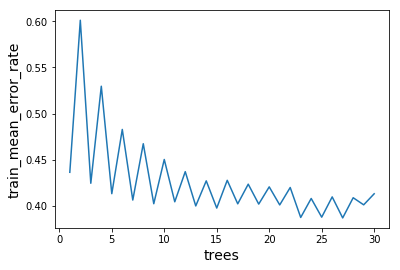

In [208]:
plt.plot(trees,train_mean_error_rate_li)
plt.xlabel('trees',fontsize=14)
plt.ylabel('train_mean_error_rate',fontsize=14)
plt.show()


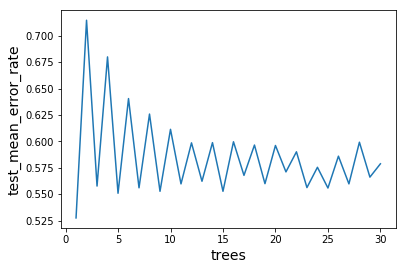

In [209]:
plt.plot(trees,test_mean_error_rate_li)
plt.xlabel('trees',fontsize=14)
plt.ylabel('test_mean_error_rate',fontsize=14)
plt.show()

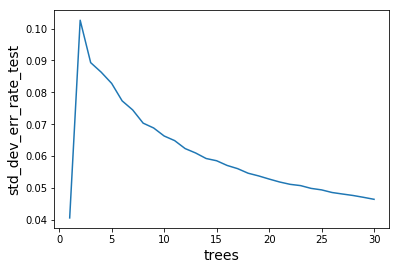

In [210]:
plt.plot(trees,stddev_err_rate_test_li)
plt.xlabel('trees',fontsize=14)
plt.ylabel('std_dev_err_rate_test',fontsize=14)
plt.show()